# ArcGIS API for Python: Cloning Your GIS Content ##
Bill Major

What are we here to learn about?

- Techniques to clone information from one Web GIS to another 
    + Needs beyond Distributed Collaboration 
    + More suited for a one time copy
- We are constantly expanding the capabilities of the ArcGIS API for Python to suit such requirements.
- Looking to provide better tools at future releases


What are we here to **not** to learn about?
*  How to move an entire ArcGIS Enterprise installation (complete environment) from DEV - TEST - DEV
*  How to move an ArcGIS Enterprise environment from one domain to another domain, or on-premises to Cloud
*  BUT, the Python API can help with many parts of it.


What works well when cloning?
- Copying web-tier authenticated users
    + No passwords stored
- Groups and Sharing
- Hosted Feature Services
- Web apps based on web app templates and WAB
- Many other item types

*Things that the REST API lends itself to easily*

What doesn't work well when cloning?
- Built-in user accounts (no access to passwords)
    + Create all accounts with a default password
- Hosted Tile Services, Map Services, Image Services
    + By URL reference only
- Complicated Story Maps

*When in doubt, always investigate an item's JSON to gain a better understanding of how well it can be easily copied to another Portal.*
http://wdcintel.maps.arcgis.com/apps/MapJournal/index.html?appid=7c71437449dd468e8949bdfcd404a002
http://wdcintel.maps.arcgis.com/sharing/rest/content/items/7c71437449dd468e8949bdfcd404a002/data?f=pjson


### How do we get started? ###
1. Establish a GIS connection to a source Portal and a GIS connection to a target Portal; assumes my Jupyter Notebook has access to both in a connected manner.
2. Copy Users
3. Copy Groups and assign ownership/membership
4. Clone Items

BOOM!

## Establish GIS Connections

In [12]:
from arcgis.gis import GIS
import arcgis
import os
print(arcgis.__version__)

1.7.1


In [13]:
source = GIS(url="https://wdcintelportal.esri.com/portal", username="robe5155")
target = GIS("home")

Enter password: ········


In [14]:
source

GIS @ https://wdcintelportal.esri.com/portal version:7.3

In [15]:
target

GIS @ https://environmental.dev.geocloud.com/portal version:8.1

### Copy Users
Create a function that will accept connection to the target portal, `User` objects from source portal and password to create users with. In addition to creating the users, this function will set their access, description, tags and other similar properties from source. If a user by the same name already exists in the target portal (possible if you opted not to clean out the target portal) then this function prints out an error message.

In [16]:
source_users = source.users.search('!esri_ & !admin')
for user in source_users:
    print(user.username + "\t:\t" + str(user.role) + "\t:\t" + str(user.provider) )

achapkowski	:	org_admin	:	arcgis
adrain_wdcportal	:	org_publisher	:	arcgis
AndrewKing_wdcintel	:	org_admin	:	arcgis
ANieto_wdcintel	:	org_admin	:	arcgis
BBiesecker_wdcintel	:	org_publisher	:	arcgis
bconklin_wdcintel	:	org_publisher	:	arcgis
bhoak7	:	org_publisher	:	arcgis
BLeis_wdcintel	:	org_publisher	:	arcgis
bmcgilvery	:	org_user	:	arcgis
bpoole_wdcintel	:	org_publisher	:	arcgis
BSheridan_wdcintel	:	org_publisher	:	arcgis
CBeck_wdcintel	:	org_publisher	:	arcgis
Christopherlee_wdcintel	:	org_publisher	:	arcgis
clecuyer	:	org_publisher	:	arcgis
CraigClevelandL1	:	org_user	:	arcgis
cstraub	:	org_publisher	:	arcgis
CWalter_wdcintel	:	org_admin	:	arcgis
cwright	:	org_user	:	arcgis
darr4905	:	org_publisher	:	arcgis
DAttaway_wdcintel	:	org_admin	:	arcgis
DJarrard_wdcintel	:	org_publisher	:	arcgis
DUy_wdcintel	:	org_publisher	:	arcgis
Fedgis2020	:	org_admin	:	arcgis
GChiques_wdcintel	:	org_admin	:	arcgis
Hawkeye360Viewer	:	org_user	:	arcgis
HButler_wdcintel	:	org_publisher	:	arcgis
Hocutt	:

In [17]:
target_users = target.users.search('!esri_ & !admin & !system_publisher')
for user in target_users:
    print(user.username + "\t:\t" + str(user.role) + "\t:\t" + str(user.provider) )

bmajor	:	org_admin	:	arcgis
portaladmin	:	org_admin	:	arcgis


In [18]:
def copy_user(target_portal, source_user, password):
    # See if the user has firstName and lastName properties
    try:
        first_name = source_user.firstName
        last_name = source_user.lastName
    except:
        # if not, split the fullName
        full_name = source_user.fullName
        first_name = full_name.split()[0]
        try:
            last_name = full_name.split()[1]
        except:
            last_name = 'NoLastName'

    try:
        # create user
        target_user = target_portal.users.create(source_user.username, password, first_name, 
                                                 last_name, source_user.email, 
                                                 source_user.description, source_user.role)

        # update user properties
        target_user.update(source_user.access, source_user.preferredView,
                           source_user.description, source_user.tags, 
                           source_user.get_thumbnail_link(),
                           culture=source_user.culture, region=source_user.region)
        return target_user
    
    except Exception as Ex:
        print(str(Ex))
        print("Unable to create user "+ source_user.username)
        return None

In [19]:
existingUsers = []
for u in target_users:
    existingUsers.append(u.username)
existingUsers

['bmajor', 'portaladmin']

In [20]:
for user in source_users:
    if not user.username in existingUsers:
        print("Creating user: " + user.username)
        copy_user(target, user, 'TestPassword@123')

Creating user: achapkowski
Creating user: adrain_wdcportal
Creating user: AndrewKing_wdcintel
Creating user: ANieto_wdcintel
Creating user: BBiesecker_wdcintel
Creating user: bconklin_wdcintel
Creating user: bhoak7
Creating user: BLeis_wdcintel
Creating user: bmcgilvery
Creating user: bpoole_wdcintel
Creating user: BSheridan_wdcintel
Creating user: CBeck_wdcintel
Creating user: Christopherlee_wdcintel
Creating user: clecuyer
Creating user: CraigClevelandL1
Creating user: cstraub
Creating user: CWalter_wdcintel
Creating user: cwright
Creating user: darr4905
Creating user: DAttaway_wdcintel
Creating user: DJarrard_wdcintel
Creating user: DUy_wdcintel
Creating user: Fedgis2020
Creating user: GChiques_wdcintel
Creating user: Hawkeye360Viewer
Creating user: HButler_wdcintel
Creating user: Hocutt
Creating user: HPhelps
Creating user: JBauer
Creating user: JBayer_wdcintel
Creating user: JBell_wdcintel
Creating user: JDawley_wdcintel
Creating user: JDillon_wdcintel
Creating user: jeades
Creati

### Copy Groups

In [21]:
# filter out system created groups
source_groups = source.groups.search("!owner:esri_* & !Basemaps & !Featured & owner:" + source.users.me.username)
source_groups

[<Group title:"Appalachian Trail" owner:robe5155>,
 <Group title:"Mali" owner:robe5155>,
 <Group title:"Transportation" owner:robe5155>,
 <Group title:"TVA" owner:robe5155>]

In [22]:
import tempfile

# List of attributes to copy over
GROUP_COPY_PROPERTIES = ['title', 'description', 'tags', 'snippet', 'phone',
                         'access', 'isInvitationOnly']

def copy_group(target, source, source_group):
    
    with tempfile.TemporaryDirectory() as temp_dir:
        try:
            target_group = {}

            for property_name in GROUP_COPY_PROPERTIES:
                target_group[property_name] = source_group[property_name]

            target_group['access'] = source_group['access']
            
            # Download the thumbnail (if one exists)
            thumbnail_file = None
            if 'thumbnail' in source_group:
                target_group['thumbnail'] = source_group.download_thumbnail(temp_dir)

            # Create the group in the target portal
            copied_group = target.groups.create_from_dict(target_group)

            # Reassign all groups to correct owners, add users, and find shared items
            members = source_group.get_members()

            if members['users']:
                copied_group.add_users(members['users'])
            if not members['owner'] == target.users.me.username:
                try:
                    resp = copied_group.reassign_to(members['owner'])
                except:
                    return copied_group
            return copied_group
        except:
            pass

In [23]:
import warnings
warnings.simplefilter("ignore")

<Group title:"Appalachian Trail" owner:robe5155>
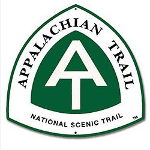

<Group title:"Mali" owner:robe5155>
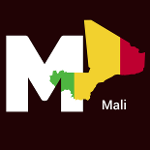

<Group title:"Transportation" owner:robe5155>
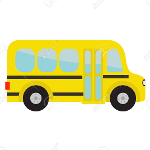

<Group title:"TVA" owner:robe5155>
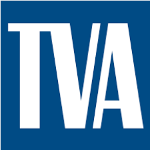

In [24]:
# Dictionary that will hold correlation between source group ids
#   and target group ids; used later
groupmapping = {}

for group in source_groups:
    target_group = copy_group(target, source, group)
    groupmapping[group.id] = target_group.id
    if target_group:
        display(target_group)

### Cloning Content

In [31]:
sourceuser = "robe5155"
user = source.users.get(sourceuser)
items = user.items()
print("--> Root")
for item in items:
    print("\t{} : {} : {}".format(item.title, item.type, item.id))
folders = user.folders
for fld in folders:
    flditems = user.items(fld['title'])
    print("--> " + fld['title'])
    for item in flditems:
        print("\t{} : {} : {}".format(item.title, item.type, item.id))

--> Root
	UntitledNotebook : Notebook : a9a7360057e148bbbf35472320b76bd2
	pan_haiti : Image Service : d2aa5dcd1525454a9f8195710d4b3fc8
	EarthquakesDateAndTime : Shapefile : c257807ab482412e87f994b751c8e4a7
	EarthquakesDateAndTime : Feature Service : 79b04850dfc34de392276233d811e58f
--> ALS Data
	ALS_Clinics_CA : Shapefile : e021186d79c74010bf770c195fcad33d
	ALS_Clinics_CA : Feature Service : 577aaa0ab16e4b8abbb192ea46700c8a
	ALS_Clinic_90minDriveTime : Shapefile : a7cd62b6fb5749a2beae613376bdd32d
	ALS_Clinic_90minDriveTime : Feature Service : 011979e72bae40cf88ce0b9ea0678732
	ALS_Clinic_City_Candidates_CA : Shapefile : 71b58b8dfa10481982ad64141a42ac14
	ALS_Clinic_City_Candidates_CA : Feature Service : 61ab13bd7fa44f6bbdb31913c084794f
	ALS_Patients_CA : Shapefile : 58fae640b9924f5598a5b14b5ad11f1e
	ALS_Patients_CA : Feature Service : 62f9126ff0974b5693af542e75b12527
	ALS WebMap : Web Map : 4a36c25a643549738bb32363c9a51e3f
--> Appalachian Data
	AppalachianTrail : Map Service : e02fd4d18d

<Item title:"pan_haiti" type:Imagery Layer owner:robe5155>
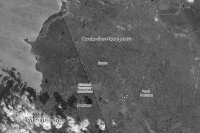

In [28]:
# Get Image Service register with Portal
imgserver = source.content.get("d2aa5dcd1525454a9f8195710d4b3fc8")
imgserver

## clone_items() ##

This function currently supports all simple data items, for example Pro Project Packages, File Geodatabases, Shapefiles, Code Samples, etc. (any item types that support download). For more complex items, the function supports hosted Web Applications (built using configurable application templates or web app builder), Operation View, Dashboards, Survey123 Forms, Workforce Projects, Web Maps, Hosted Feature Layers, Hosted Feature Layer Views, and Feature Collections. For any of these complex items it will also clone the item’s dependencies. For example if you clone a Web Application, it will also clone the Web Map and any hosted feature layers referenced by the Web Map.

The function does not support cloning of any other service types, for example map services, tile layer, scene layer, etc. If these items are referenced in a web map, the web map will be cloned but it will still reference the original service.


In [29]:
target.content.clone_items?

<Item title:"pan_haiti" type:Imagery Layer owner:bmajor>
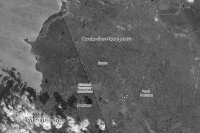

In [30]:
cloned_items = target.content.clone_items(items=[imgserver], copy_data=True)
for ci in cloned_items:
    display(ci)

<Item title:"EarthquakesDateAndTime" type:Feature Layer Collection owner:robe5155>
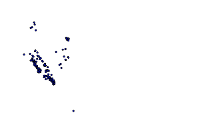

In [32]:
#Copy a Hosted Feature Service of Earthquakes
hostedfs = source.content.get("79b04850dfc34de392276233d811e58f")
hostedfs

<Item title:"EarthquakesDateAndTime" type:Feature Layer Collection owner:bmajor>
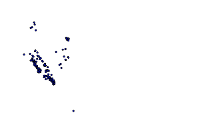

In [33]:
cloned_items = target.content.clone_items(items=[hostedfs])
for ci in cloned_items:
    display(ci)

<Item title:"Mali WebMap" type:Web Map owner:robe5155>
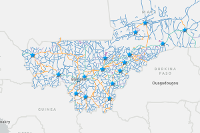

In [34]:
webmap = source.content.get("390197e47b594e2cae1aa68f48dd1f9d")
webmap

<Item title:"MaliRoads" type:Feature Layer Collection owner:bmajor>
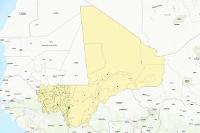

<Item title:"MaliMajorCities" type:Feature Layer Collection owner:bmajor>
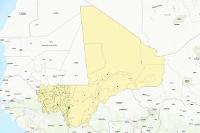

<Item title:"Mali WebMap" type:Web Map owner:bmajor>
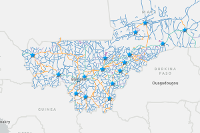

In [35]:
cloned_items = target.content.clone_items(items=[webmap], folder="Mali")
for ci in cloned_items:
    display(ci)

In [27]:
wab = source.content.get("e2d31db57ef5440d842bc6dbf310ed1c")
wab

<Item title:"Mali WebMap WAB" type:Web Mapping Application owner:bmajor>

In [28]:
mali_group = target.groups.search("MaliData")[0]
print(mali_group.id)

c87049982dfc4747b144c2a97fccdaa6


<Item title:"Mali WebMap" type:Web Map owner:bmajor>
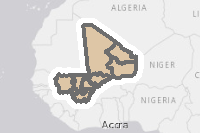

<Item title:"Mali WebMap WAB" type:Web Mapping Application owner:bmajor>

In [29]:
cloned_items = target.content.clone_items(items=[wab], copy_data=True, folder="Mali")
for ci in cloned_items:
    display(ci)    
    if wab.access == "org":
        ci.share(everyone=False, org=True, groups=mali_group.id)
    else:
        ci.share(everyone=True, org=False, groups=mali_group.id)
   

<Item title:"Traffic" type:Map Image Layer owner:bmajor>
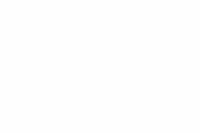

In [30]:
securedsvc = source.content.get("4e5ed43bf557429f80e0e7d94543a2ac")
securedsvc

<Item title:"Traffic" type:Map Image Layer owner:bmajor>
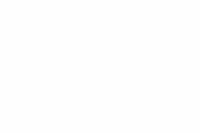

In [31]:
cloned_items = target.content.clone_items(items=[securedsvc], copy_data=True)
for ci in cloned_items:
    display(ci)

### What else could you "clone" (i.e. copy/apply)? ###
- Portal skinning, e.g. description, banner, etc.
- Configuring Portal Admin characteristics to match, e.g. SSL certificates, security, etc.


## Future Improvements ##
- Continued improvements to clone_items() to fully support sharing, additional item types, etc.
- Creating disconnected packages that can be moved as a "bundle" between environments
- Handling Secure Service proxy items (?)
- Your input?   https://github.com/Esri/arcgis-python-api